# Final Project - Data Science

## Student: Grigoriadis Panagiotis
**ΑΕΜ: 1833**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Read data 'CharlesBookClub'

In [2]:
import pandas as pd

df = pd.read_csv("CBC.csv")

In [3]:
#shuffle data
df = df.sample(frac=1)
df.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Florence,Related purchase
3661,3662,30442,1,420,16,11,70,4,0,3,1,1,0,6,0,0,0,0,6
3418,3419,28273,0,112,24,2,32,0,0,0,0,0,0,1,0,0,0,0,1
1648,1649,13684,1,122,30,1,30,0,0,0,0,0,0,0,0,0,0,0,0
3501,3502,29071,0,247,6,1,6,0,0,0,0,0,0,0,0,0,0,0,0
2529,2530,20882,1,108,10,1,10,0,0,0,0,0,0,0,0,0,0,0,0


# Preprocessing and RFM

RFM stands for the three dimensions:

- Recency – How recently did the customer purchase?
- Frequency – How often do they purchase?
- Monetary Value – How much do they spend?

## RFM Segmentation

**Extract 'M', 'R', 'F' columns and add the correct values indicating the class they belong**
The higher the values, the more valuable the client!!

In [4]:
rfm = df.loc[:,('M', 'R', 'F')]

In [5]:
rfm.head()

,M,R,F
3661,420,16,11
3418,112,24,2
1648,122,30,1
3501,247,6,1
2529,108,10,1


In [6]:
rfm.loc[rfm['R'] < 3, 'R'] = 4
rfm.loc[ (rfm['R'] > 2) & (rfm['R'] < 7), 'R'] = 3
rfm.loc[ (rfm['R'] > 6) & (rfm['R'] < 13), 'R'] = 2
rfm.loc[rfm['R'] > 12, 'R'] = 1

In [7]:
rfm.loc[rfm['F'] == 1, 'F'] = 1
rfm.loc[ (rfm['F'] == 2), 'F' ] = 2
rfm.loc[ (rfm['F'] > 2), 'F'] = 3

In [8]:
rfm.loc[ (rfm['M'] > -1) & (rfm['M'] < 26), 'M'] = 1
rfm.loc[ (rfm['M'] > 25) & (rfm['M'] < 51), 'M'] = 2
rfm.loc[ (rfm['M'] > 50) & (rfm['M'] < 101), 'M'] = 3
rfm.loc[ (rfm['M'] > 100) & (rfm['M'] < 201), 'M'] = 4
rfm.loc[ (rfm['M'] > 200) , 'M'] = 5

In [9]:
rfm.head()

,M,R,F
3661,5,1,3
3418,4,1,2
1648,4,1,1
3501,5,3,1
2529,4,2,1


Combine 'RFM' columns to create a column that indicates the most valuable clients <br>
(We don't have an indication as to which of the 3 variables is the most important, so we will consider them equally important)

In [10]:
rfm['RFM'] = (rfm.R + rfm.F + rfm.M) /3

In [11]:
rfm.head()

,M,R,F,RFM
3661,5,1,3,3.000000
3418,4,1,2,2.333333
1648,4,1,1,2.000000
3501,5,3,1,3.000000
2529,4,2,1,2.333333


Drop previous RFM columns

In [12]:
df_temp = df.drop(columns=['M', 'R', 'F'])

In [13]:
df_temp.head()

,Seq#,ID#,Gender,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Florence,Related purchase
3661,3662,30442,1,70,4,0,3,1,1,0,6,0,0,0,0,6
3418,3419,28273,0,32,0,0,0,0,0,0,1,0,0,0,0,1
1648,1649,13684,1,30,0,0,0,0,0,0,0,0,0,0,0,0
3501,3502,29071,0,6,0,0,0,0,0,0,0,0,0,0,0,0
2529,2530,20882,1,10,0,0,0,0,0,0,0,0,0,0,0,0


Add the new edited RFM columns

In [14]:
frames = [df_temp, rfm]
full_rfm = pd.concat(frames,sort=False,axis=1)

In [15]:
full_rfm.head()

,Seq#,ID#,Gender,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Florence,Related purchase,M,R,F,RFM
3661,3662,30442,1,70,4,0,3,1,1,0,6,0,0,0,0,6,5,1,3,3.000000
3418,3419,28273,0,32,0,0,0,0,0,0,1,0,0,0,0,1,4,1,2,2.333333
1648,1649,13684,1,30,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,2.000000
3501,3502,29071,0,6,0,0,0,0,0,0,0,0,0,0,0,0,5,3,1,3.000000
2529,2530,20882,1,10,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,2.333333


Sort our dataframe based on the 'RFM' value

In [16]:
full_rfm = full_rfm.sort_values('RFM', ascending=False )

In [17]:
full_rfm.head()

,Seq#,ID#,Gender,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Florence,Related purchase,M,R,F,RFM
370,371,3244,1,20,0,0,2,0,1,0,0,0,0,0,0,0,5,3,3,3.666667
3557,3558,29551,1,20,1,1,1,0,0,0,2,0,1,0,0,3,5,3,3,3.666667
1092,1093,9162,1,34,2,1,1,0,0,2,0,1,0,2,0,5,5,3,3,3.666667
3535,3536,29379,1,24,4,0,0,0,3,1,1,0,0,1,0,3,5,3,3,3.666667
1582,1583,13126,1,74,1,1,4,0,1,0,0,0,0,0,0,0,5,3,3,3.666667


**Now our clients are sorted based on how valuable they are!!**

Lets find our average RFM

In [18]:
avg_RFM = full_rfm["RFM"].mean()
print ('Average RFM:',avg_RFM)

Average RFM: 2.7078333333333333


**Split our dataframe to train and test**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
full_rfm = full_rfm.sample(frac=1)

In [21]:
x = full_rfm.drop(columns = ['Florence'])
y = full_rfm.Florence

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state=1)

In [23]:
train_RFM = pd.concat([X_train, y_train], axis=1, sort=False)
train_RFM.head()

,Seq#,ID#,Gender,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Related purchase,M,R,F,RFM,Florence
1206,1207,10093,1,66,3,0,2,2,0,1,1,0,0,0,2,5,2,3,3.333333,0
776,777,6650,1,6,0,0,0,0,0,0,0,0,0,0,0,3,3,1,2.333333,0
1631,1632,13547,1,34,2,1,1,0,0,1,0,1,0,0,2,5,2,3,3.333333,0
1066,1067,8927,1,16,1,0,0,0,0,0,0,0,0,0,0,5,2,2,3.000000,0
3253,3254,26782,0,30,0,2,2,0,1,0,0,0,0,0,0,5,3,3,3.666667,0


In [24]:
print (train_RFM.shape)

(2400, 20)


In [25]:
test_RFM = pd.concat([X_test, y_test], axis=1, sort=False)
test_RFM.head()

,Seq#,ID#,Gender,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Related purchase,M,R,F,RFM,Florence
2119,2120,17496,0,60,0,1,5,1,1,0,2,0,0,0,2,5,1,3,3.000000,0
1995,1996,16537,0,12,0,0,0,0,0,0,0,1,0,0,1,2,2,1,1.666667,0
1414,1415,11788,1,50,1,0,4,1,0,1,1,1,0,0,3,5,1,3,3.000000,0
3725,3726,30982,1,18,0,0,1,0,0,0,0,0,0,0,0,5,3,3,3.666667,0
1415,1416,11797,1,8,0,0,0,0,0,0,0,0,0,0,0,5,2,1,2.666667,0


In [26]:
print (test_RFM.shape)

(1600, 20)


## Exercise 1

**Entire dataset response rate:**

Let's found how many customers bought the Florence book from our training set

In [27]:
yes_no = train_RFM.groupby('Florence').size()
print ('Number of NO-buyers and buyers:',yes_no)
all_count = train_RFM.shape[0]
no_count = yes_no [0]
yes_count = yes_no [1]

Number of NO-buyers and buyers: Florence
0    2189
1     211
dtype: int64


In [28]:
overall_no_prcnt = no_count / all_count 
overall_yes_prcnt = yes_count / all_count 
print ('% of buyers:',overall_yes_prcnt*100)
print ('% of NO-buyers:', overall_no_prcnt*100)

% of buyers: 8.791666666666668
% of NO-buyers: 91.20833333333334


**For every combination (4x5x3=60) response rate:**

In [29]:
import numpy as np

In [30]:
#store above average RFM combinations
store_r = []
store_f = []
store_m = []

#for every combination of RFM
for r in range(1,5):
    for f in range (1,4):
        for m in range (1,6):
            print ('\nR = ',r,'\tF = ',f,'\tM = ',m,':\n')
            
            #Chose the subset of our dataframe
            subset = train_RFM.loc[(train_RFM['R'] == r) & (train_RFM['F'] == f) & (train_RFM['M'] == m)]
            
            #check if the subset is empty
            if subset.empty:
                print('There are no customers with: \n\tR = ',r,'F = ',f,'M = ',m,'\n')
            else:
                #check how many bought the book and how many didn't
                yes_no = subset.groupby('Florence').size()
                print ('Number of NO-buyers and buyers:',yes_no)
                length = len(yes_no)
                all_count = subset.shape[0]
                print ('Total # of customers in this combination:',all_count)
                
                #check if there are both '1' and '0'
                if length == 2:
                    if yes_no.index[0] == 0:
                        no_count = yes_no [0]
                    else:
                        no_count = 0

                    if yes_no.index[1] == 1:
                        yes_count = yes_no [1]
                    else:
                        yes_count = 0
                else:
                    if yes_no.index[0] == 0:
                        no_count = yes_no [0]
                    else:
                        no_count = 0

                    if yes_no.index[0] == 1:
                        yes_count = yes_no [1]
                    else:
                        yes_count = 0

                #extract the percentages
                no_prcnt = no_count / all_count 
                yes_prcnt = yes_count / all_count 
                print ('% of buyers:',yes_prcnt*100)
                print ('% of NO-buyers:', no_prcnt*100)
                
                if (yes_prcnt > overall_yes_prcnt):
                    print ('-----> This combination has higher response rate than the overall response',
                           'in the training data!!')
                    
                    #save the RFM values
                    store_r.append(r)
                    store_f.append(f)
                    store_m.append(m)
                    
                    


R =  1 	F =  1 	M =  1 :

Number of NO-buyers and buyers: Florence
0    18
dtype: int64
Total # of customers in this combination: 18
% of buyers: 0.0
% of NO-buyers: 100.0

R =  1 	F =  1 	M =  2 :

Number of NO-buyers and buyers: Florence
0    24
1     1
dtype: int64
Total # of customers in this combination: 25
% of buyers: 4.0
% of NO-buyers: 96.0

R =  1 	F =  1 	M =  3 :

Number of NO-buyers and buyers: Florence
0    57
1     8
dtype: int64
Total # of customers in this combination: 65
% of buyers: 12.307692307692308
% of NO-buyers: 87.6923076923077
-----> This combination has higher response rate than the overall response in the training data!!

R =  1 	F =  1 	M =  4 :

Number of NO-buyers and buyers: Florence
0    100
1      9
dtype: int64
Total # of customers in this combination: 109
% of buyers: 8.256880733944955
% of NO-buyers: 91.74311926605505

R =  1 	F =  1 	M =  5 :

Number of NO-buyers and buyers: Florence
0    114
1      9
dtype: int64
Total # of customers in this comb

There are no customers with: 
	R =  4 F =  3 M =  4 


R =  4 	F =  3 	M =  5 :

There are no customers with: 
	R =  4 F =  3 M =  5 



## Exercise 2

In [31]:
#check how many combinations are above 
above_avg_counter = len(store_r)

print ('Working on validation set with above average combinations!!!\n')

for i in range (0,above_avg_counter):
    r = store_r[i]
    f = store_f[i]
    m = store_m[i]
    print ('\nR = ',r,'\tF = ',f,'\tM = ',m,':\n')
            
    #Chose the subset of our dataframe
    subset = test_RFM.loc[(test_RFM['R'] == r) & (test_RFM['F'] == f) & (test_RFM['M'] == m)]

    #check if the subset is empty
    if subset.empty:
        print('There are no customers with: \n\tR = ',r,'F = ',f,'M = ',m,'\n')
    else:
        #check how many bought the book and how many didn't
        yes_no = subset.groupby('Florence').size()
        print ('Number of NO-buyers and buyers:',yes_no)
        length = len(yes_no)
        all_count = subset.shape[0]
        print ('Total # of customers in this combination:',all_count)

        #check if there are both '1' and '0'
        if length == 2:
            if yes_no.index[0] == 0:
                no_count = yes_no [0]
            else:
                no_count = 0

            if yes_no.index[1] == 1:
                yes_count = yes_no [1]
            else:
                yes_count = 0
        else:
            if yes_no.index[0] == 0:
                no_count = yes_no [0]
            else:
                no_count = 0

            if yes_no.index[0] == 1:
                yes_count = yes_no [1]
            else:
                yes_count = 0

        #extract the percentages
        no_prcnt = no_count / all_count 
        yes_prcnt = yes_count / all_count 
        print ('% of buyers:',yes_prcnt*100)
        print ('% of NO-buyers:', no_prcnt*100)

        if (yes_prcnt > overall_yes_prcnt):
            print ('-----> VALIDATED higher response rate than the overall response',
                   'in the training data!!')
        else:
            print (':( Response rate lower that overall response in the training data')
            

Working on validation set with above average combinations!!!


R =  1 	F =  1 	M =  3 :

Number of NO-buyers and buyers: Florence
0    40
1     4
dtype: int64
Total # of customers in this combination: 44
% of buyers: 9.090909090909092
% of NO-buyers: 90.9090909090909
-----> VALIDATED higher response rate than the overall response in the training data!!

R =  1 	F =  3 	M =  5 :

Number of NO-buyers and buyers: Florence
0    195
1      9
dtype: int64
Total # of customers in this combination: 204
% of buyers: 4.411764705882353
% of NO-buyers: 95.58823529411765
:( Response rate lower that overall response in the training data

R =  2 	F =  1 	M =  1 :

Number of NO-buyers and buyers: Florence
0    5
1    1
dtype: int64
Total # of customers in this combination: 6
% of buyers: 16.666666666666664
% of NO-buyers: 83.33333333333334
-----> VALIDATED higher response rate than the overall response in the training data!!

R =  2 	F =  2 	M =  4 :

Number of NO-buyers and buyers: Florence
0    51
1

## Exercise 3

### Train response rates

In [32]:
#store low, medium, high RFM combinations
high_r = []
high_f = []
high_m = []
med_r = []
med_f = []
med_m = []
low_r = []
low_f = []
low_m = []

#for every combination of RFM
for r in range(1,5):
    for f in range (1,4):
        for m in range (1,6):
            print ('\nR = ',r,'\tF = ',f,'\tM = ',m,':\n')
            
            #Chose the subset of our dataframe
            subset = train_RFM.loc[(train_RFM['R'] == r) & (train_RFM['F'] == f) & (train_RFM['M'] == m)]
            
            #check if the subset is empty
            if subset.empty:
                print('There are no customers with: \n\tR = ',r,'F = ',f,'M = ',m,'\n')
            else:
                #check how many bought the book and how many didn't
                yes_no = subset.groupby('Florence').size()
                print ('Number of NO-buyers and buyers:',yes_no)
                length = len(yes_no)
                all_count = subset.shape[0]
                print ('Total # of customers in this combination:',all_count)
                
                #check if there are both '1' and '0'
                if length == 2:
                    if yes_no.index[0] == 0:
                        no_count = yes_no [0]
                    else:
                        no_count = 0

                    if yes_no.index[1] == 1:
                        yes_count = yes_no [1]
                    else:
                        yes_count = 0
                else:
                    if yes_no.index[0] == 0:
                        no_count = yes_no [0]
                    else:
                        no_count = 0

                    if yes_no.index[0] == 1:
                        yes_count = yes_no [1]
                    else:
                        yes_count = 0

                #extract the percentages
                no_prcnt = no_count / all_count 
                yes_prcnt = yes_count / all_count 
                print ('% of buyers:',yes_prcnt*100)
                print ('% of NO-buyers:', no_prcnt*100)
                
                if (yes_prcnt > (2*overall_yes_prcnt) ):
                    print ('-----> HIGH! This combination has 2x higher response rate than the overall ',
                           'response in the training data!!')
                    
                    #save the RFM values
                    high_r.append(r)
                    high_f.append(f)
                    high_m.append(m)
                elif (yes_prcnt > (overall_yes_prcnt) ) :
                    print ('-----> MEDIUM! This combination has just higher response rate than ',
                           'the overall response in the training data!!')
                    
                    #save the RFM values
                    med_r.append(r)
                    med_f.append(f)
                    med_m.append(m)
                else:
                    print ('-----> LOW! This combination has lower response rate than the overall ',
                           'response in the training data!!')
                    
                    #save the RFM values
                    low_r.append(r)
                    low_f.append(f)
                    low_m.append(m)
                    


R =  1 	F =  1 	M =  1 :

Number of NO-buyers and buyers: Florence
0    18
dtype: int64
Total # of customers in this combination: 18
% of buyers: 0.0
% of NO-buyers: 100.0
-----> LOW! This combination has lower response rate than the overall  response in the training data!!

R =  1 	F =  1 	M =  2 :

Number of NO-buyers and buyers: Florence
0    24
1     1
dtype: int64
Total # of customers in this combination: 25
% of buyers: 4.0
% of NO-buyers: 96.0
-----> LOW! This combination has lower response rate than the overall  response in the training data!!

R =  1 	F =  1 	M =  3 :

Number of NO-buyers and buyers: Florence
0    57
1     8
dtype: int64
Total # of customers in this combination: 65
% of buyers: 12.307692307692308
% of NO-buyers: 87.6923076923077
-----> MEDIUM! This combination has just higher response rate than  the overall response in the training data!!

R =  1 	F =  1 	M =  4 :

Number of NO-buyers and buyers: Florence
0    100
1      9
dtype: int64
Total # of customers in

Number of NO-buyers and buyers: Florence
0    30
1     1
dtype: int64
Total # of customers in this combination: 31
% of buyers: 3.225806451612903
% of NO-buyers: 96.7741935483871
-----> LOW! This combination has lower response rate than the overall  response in the training data!!

R =  3 	F =  1 	M =  4 :

Number of NO-buyers and buyers: Florence
0    39
1     5
dtype: int64
Total # of customers in this combination: 44
% of buyers: 11.363636363636363
% of NO-buyers: 88.63636363636364
-----> MEDIUM! This combination has just higher response rate than  the overall response in the training data!!

R =  3 	F =  1 	M =  5 :

Number of NO-buyers and buyers: Florence
0    47
1     6
dtype: int64
Total # of customers in this combination: 53
% of buyers: 11.320754716981133
% of NO-buyers: 88.67924528301887
-----> MEDIUM! This combination has just higher response rate than  the overall response in the training data!!

R =  3 	F =  2 	M =  1 :

There are no customers with: 
	R =  3 F =  2 M =  1

### Test response rates

#### High

In [33]:
#check how many combinations are HIGH
high_counter = len(high_r)

#counter of all high response rate combinations
total_high_counter = 0
total_high_yes_counter = 0

print ('Working on validation set with above average combinations!!!\n')

for i in range (0,high_counter):
    r = high_r[i]
    f = high_f[i]
    m = high_m[i]
    print ('\nR = ',r,'\tF = ',f,'\tM = ',m,':\n')
            
    #Chose the subset of our dataframe
    subset = test_RFM.loc[(test_RFM['R'] == r) & (test_RFM['F'] == f) & (test_RFM['M'] == m)]

    #check if the subset is empty
    if subset.empty:
        print('There are no customers with: \n\tR = ',r,'F = ',f,'M = ',m,'\n')
    else:
        #check how many bought the book and how many didn't
        yes_no = subset.groupby('Florence').size()
        print ('Number of NO-buyers and buyers:',yes_no)
        length = len(yes_no)
        all_count = subset.shape[0]
        print ('Total # of customers in this combination:',all_count)

        #check if there are both '1' and '0'
        if length == 2:
            if yes_no.index[0] == 0:
                no_count = yes_no [0]
            else:
                no_count = 0

            if yes_no.index[1] == 1:
                yes_count = yes_no [1]
            else:
                yes_count = 0
        else:
            if yes_no.index[0] == 0:
                no_count = yes_no [0]
            else:
                no_count = 0

            if yes_no.index[0] == 1:
                yes_count = yes_no [1]
            else:
                yes_count = 0

        #extract the percentages
        no_prcnt = no_count / all_count 
        yes_prcnt = yes_count / all_count 
        print ('% of buyers:',yes_prcnt*100)
        print ('% of NO-buyers:', no_prcnt*100)

        if (yes_prcnt > (2*overall_yes_prcnt) ):
            print ('-----> VALIDATED 2x higher response rate than the overall response',
                   'in the training data!!')
        else:
            print (':( Response rate lower than 2x the overall response in the training data')
            
        #adjust total counter
        total_high_counter = total_high_counter + all_count
        total_high_yes_counter = total_high_yes_counter + yes_count
            

Working on validation set with above average combinations!!!


R =  3 	F =  2 	M =  2 :

Number of NO-buyers and buyers: Florence
0    4
dtype: int64
Total # of customers in this combination: 4
% of buyers: 0.0
% of NO-buyers: 100.0
:( Response rate lower than 2x the overall response in the training data

R =  3 	F =  3 	M =  2 :

There are no customers with: 
	R =  3 F =  3 M =  2 


R =  3 	F =  3 	M =  3 :

Number of NO-buyers and buyers: Florence
0    6
dtype: int64
Total # of customers in this combination: 6
% of buyers: 0.0
% of NO-buyers: 100.0
:( Response rate lower than 2x the overall response in the training data


#### Medium

In [34]:
#check how many combinations are HIGH
med_counter = len(med_r)

#counter of all med response rate combinations
total_med_counter = 0
total_med_yes_counter = 0

print ('Working on validation set with above average combinations!!!\n')

for i in range (0,med_counter):
    r = med_r[i]
    f = med_f[i]
    m = med_m[i]
    print ('\nR = ',r,'\tF = ',f,'\tM = ',m,':\n')
            
    #Chose the subset of our dataframe
    subset = test_RFM.loc[(test_RFM['R'] == r) & (test_RFM['F'] == f) & (test_RFM['M'] == m)]

    #check if the subset is empty
    if subset.empty:
        print('There are no customers with: \n\tR = ',r,'F = ',f,'M = ',m,'\n')
    else:
        #check how many bought the book and how many didn't
        yes_no = subset.groupby('Florence').size()
        print ('Number of NO-buyers and buyers:',yes_no)
        length = len(yes_no)
        all_count = subset.shape[0]
        print ('Total # of customers in this combination:',all_count)

        #check if there are both '1' and '0'
        if length == 2:
            if yes_no.index[0] == 0:
                no_count = yes_no [0]
            else:
                no_count = 0

            if yes_no.index[1] == 1:
                yes_count = yes_no [1]
            else:
                yes_count = 0
        else:
            if yes_no.index[0] == 0:
                no_count = yes_no [0]
            else:
                no_count = 0

            if yes_no.index[0] == 1:
                yes_count = yes_no [1]
            else:
                yes_count = 0

        #extract the percentages
        no_prcnt = no_count / all_count 
        yes_prcnt = yes_count / all_count 
        print ('% of buyers:',yes_prcnt*100)
        print ('% of NO-buyers:', no_prcnt*100)

        if ( (yes_prcnt > overall_yes_prcnt ) & (yes_prcnt <= (2*overall_yes_prcnt)) ):
            print ('-----> VALIDATED Somewhat higher response rate than the overall response',
                   'in the training data!!')
        else:
            print (':( Response rate is not barely higher the overall response in the training data')
            
        #adjust total counter
        total_med_counter = total_med_counter + all_count
        total_med_yes_counter = total_med_yes_counter + yes_count

Working on validation set with above average combinations!!!


R =  1 	F =  1 	M =  3 :

Number of NO-buyers and buyers: Florence
0    40
1     4
dtype: int64
Total # of customers in this combination: 44
% of buyers: 9.090909090909092
% of NO-buyers: 90.9090909090909
-----> VALIDATED Somewhat higher response rate than the overall response in the training data!!

R =  1 	F =  3 	M =  5 :

Number of NO-buyers and buyers: Florence
0    195
1      9
dtype: int64
Total # of customers in this combination: 204
% of buyers: 4.411764705882353
% of NO-buyers: 95.58823529411765
:( Response rate is not barely higher the overall response in the training data

R =  2 	F =  1 	M =  1 :

Number of NO-buyers and buyers: Florence
0    5
1    1
dtype: int64
Total # of customers in this combination: 6
% of buyers: 16.666666666666664
% of NO-buyers: 83.33333333333334
-----> VALIDATED Somewhat higher response rate than the overall response in the training data!!

R =  2 	F =  2 	M =  4 :

Number of NO-buyer

#### Low

In [35]:
#check how many combinations are HIGH
low_counter = len(low_r)

#counter of all high response rate combinations
total_low_counter = 0
total_low_yes_counter = 0

print ('Working on validation set with above average combinations!!!\n')

for i in range (0,low_counter):
    r = low_r[i]
    f = low_f[i]
    m = low_m[i]
    print ('\nR = ',r,'\tF = ',f,'\tM = ',m,':\n')
            
    #Chose the subset of our dataframe
    subset = test_RFM.loc[(test_RFM['R'] == r) & (test_RFM['F'] == f) & (test_RFM['M'] == m)]

    #check if the subset is empty
    if subset.empty:
        print('There are no customers with: \n\tR = ',r,'F = ',f,'M = ',m,'\n')
    else:
        #check how many bought the book and how many didn't
        yes_no = subset.groupby('Florence').size()
        print ('Number of NO-buyers and buyers:',yes_no)
        length = len(yes_no)
        all_count = subset.shape[0]
        print ('Total # of customers in this combination:',all_count)

        #check if there are both '1' and '0'
        if length == 2:
            if yes_no.index[0] == 0:
                no_count = yes_no [0]
            else:
                no_count = 0

            if yes_no.index[1] == 1:
                yes_count = yes_no [1]
            else:
                yes_count = 0
        else:
            if yes_no.index[0] == 0:
                no_count = yes_no [0]
            else:
                no_count = 0

            if yes_no.index[0] == 1:
                yes_count = yes_no [1]
            else:
                yes_count = 0

        #extract the percentages
        no_prcnt = no_count / all_count 
        yes_prcnt = yes_count / all_count 
        print ('% of buyers:',yes_prcnt*100)
        print ('% of NO-buyers:', no_prcnt*100)

        if ( yes_prcnt <= overall_yes_prcnt ):
            print ('-----> VALIDATED response rate <= overall response',
                   'in the training data!!')
        else:
            print (':( Response rate > overall response in the training data')
           
        #adjust total counter
        total_low_counter = total_low_counter + all_count
        total_low_yes_counter = total_low_yes_counter + yes_count

Working on validation set with above average combinations!!!


R =  1 	F =  1 	M =  1 :

Number of NO-buyers and buyers: Florence
0    4
dtype: int64
Total # of customers in this combination: 4
% of buyers: 0.0
% of NO-buyers: 100.0
-----> VALIDATED response rate <= overall response in the training data!!

R =  1 	F =  1 	M =  2 :

Number of NO-buyers and buyers: Florence
0    11
1     2
dtype: int64
Total # of customers in this combination: 13
% of buyers: 15.384615384615385
% of NO-buyers: 84.61538461538461
:( Response rate > overall response in the training data

R =  1 	F =  1 	M =  4 :

Number of NO-buyers and buyers: Florence
0    64
1     5
dtype: int64
Total # of customers in this combination: 69
% of buyers: 7.246376811594203
% of NO-buyers: 92.7536231884058
-----> VALIDATED response rate <= overall response in the training data!!

R =  1 	F =  1 	M =  5 :

Number of NO-buyers and buyers: Florence
0    79
1     4
dtype: int64
Total # of customers in this combination: 83
% of b

### Draw the lift curve:

In [36]:
print ('# of customers in the low response rate combinations:',total_low_counter)
print ('# bought the Florence Book:',total_low_yes_counter)
print ('Total percentage:',total_low_yes_counter*100/total_low_counter,'%')

print ('\n# of customers in the med response rate combinations:',total_med_counter)
print ('# bought the Florence Book:',total_med_yes_counter)
print ('Total percentage:',total_med_yes_counter*100/total_med_counter,'%')

print ('\n# of customers in the high response rate combinations:',total_high_counter)
print ('# bought the Florence Book:',total_high_yes_counter)
print ('Total percentage:',total_high_yes_counter*100/total_high_counter,'%')



# of customers in the low response rate combinations: 849
# bought the Florence Book: 59
Total percentage: 6.9493521790341575 %

# of customers in the med response rate combinations: 739
# bought the Florence Book: 68
Total percentage: 9.201623815967524 %

# of customers in the high response rate combinations: 10
# bought the Florence Book: 0
Total percentage: 0.0 %


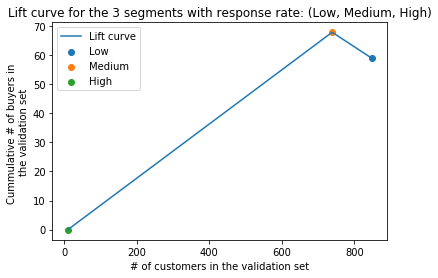

In [37]:
plt.scatter (total_low_counter,total_low_yes_counter, label='Low')
plt.scatter (total_med_counter,total_med_yes_counter, label='Medium')
plt.scatter (total_high_counter,total_high_yes_counter, label='High')

xvalues = [total_low_counter, total_med_counter, total_high_counter]
yvalues = [total_low_yes_counter, total_med_yes_counter, total_high_yes_counter]

plt.plot(xvalues,yvalues,'-', label = 'Lift curve')
plt.ylabel ('Cummulative # of buyers in \nthe validation set')
plt.xlabel ('# of customers in the validation set')
plt.legend()
plt.title('Lift curve for the 3 segments with response rate: (Low, Medium, High)')
plt.show()

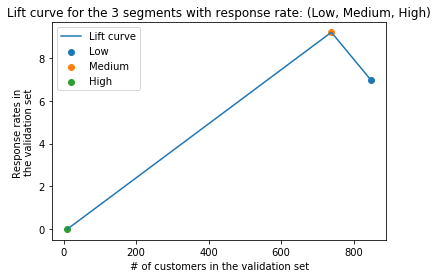

In [38]:
plt.scatter (total_low_counter,total_low_yes_counter*100/total_low_counter, label='Low')
plt.scatter (total_med_counter,total_med_yes_counter*100/total_med_counter, label='Medium')
plt.scatter (total_high_counter,total_high_yes_counter*100/total_high_counter, label='High')

xvalues = [total_low_counter, total_med_counter, total_high_counter]
yvalues = [total_low_yes_counter*100/total_low_counter,
           total_med_yes_counter*100/total_med_counter,
           total_high_yes_counter*100/total_high_counter]

plt.plot(xvalues,yvalues,'-', label = 'Lift curve')
plt.ylabel ('Response rates in \nthe validation set')
plt.xlabel ('# of customers in the validation set')
plt.legend()
plt.title('Lift curve for the 3 segments with response rate: (Low, Medium, High)')
plt.show()

# Apply ML algorithms

## Normalize and split data

In [39]:
from sklearn import preprocessing
import numpy as np

In [40]:
temp = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
temp_scaled = min_max_scaler.fit_transform(temp)
normal_data = pd.DataFrame(temp_scaled)

#Add the original column names
normal_data.columns = df.columns

C:\Users\pgrig\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
normal_data.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Florence,Related purchase
0,0.915479,0.923070,1.0,0.872845,0.411765,0.909091,0.701031,0.571429,0.0,0.428571,0.2,0.25,0.0,1.000000,0.0,0.0,0.0,0.0,0.750
1,0.854714,0.857247,0.0,0.209052,0.647059,0.090909,0.309278,0.000000,0.0,0.000000,0.0,0.00,0.0,0.166667,0.0,0.0,0.0,0.0,0.125
2,0.412103,0.414512,1.0,0.230603,0.823529,0.000000,0.288660,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000
3,0.875469,0.881464,0.0,0.500000,0.117647,0.000000,0.041237,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000
4,0.632408,0.632951,1.0,0.200431,0.235294,0.000000,0.082474,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000


Split data to X and y

In [42]:
predictor_var = ['R', 'F', 'M', 'FirstPurch', 'Related purchase']
outcome_var = 'Florence'

In [43]:
X = normal_data[predictor_var]
y = normal_data[outcome_var]

Split to train and test data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state=1)

## Exercise 4: k-NN Classification

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
def k_means(k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    return (neigh)

Fit our data and calculate accuracy

In [48]:
max_acc = 0

for k in range(1,12):
    print ('\n\tk_Means for: k =',k)
    neigh = k_means(k)
    
    #Fit the model using our training data
    neigh.fit(X_train,y_train)
    
    #Make predictions on our validation data
    print('\tAccuracy:',neigh.score(X_test, y_test)*100,'%')
    
    print('Instances and corresponding classes:\n',neigh.predict(X_test))
    print ('Return probability estimates for the test data:\n',neigh.predict_proba(X_test))
    
    #calculate max accuracy and keep corresponding k
    if (neigh.score(X_test, y_test) >= max_acc):
        max_acc = neigh.score(X_test, y_test)
        max_k = k
        max_classes = neigh.predict(X_test)
        max_prob = neigh.predict_proba(X_test)


	k_Means for: k = 1
	Accuracy: 83.625 %
Instances and corresponding classes:
 [0. 0. 0. ... 0. 0. 0.]
Return probability estimates for the test data:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]

	k_Means for: k = 2
	Accuracy: 89.8125 %
Instances and corresponding classes:
 [0. 0. 0. ... 0. 0. 0.]
Return probability estimates for the test data:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]

	k_Means for: k = 3
	Accuracy: 88.8125 %
Instances and corresponding classes:
 [0. 0. 0. ... 0. 0. 0.]
Return probability estimates for the test data:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]

	k_Means for: k = 4
	Accuracy: 90.375 %
Instances and corresponding classes:
 [0. 0. 0. ... 0. 0. 0.]
Return probability estimates for the test data:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]

	k_Means for: k = 5
	Accuracy: 90.1875 %
Instances and corresponding classes:
 [0. 0. 0. ... 0. 0. 0.]
Return probability estimates for the test data

In [49]:
#best k
print ('Best k value:', max_k)

Best k value: 11


In [50]:
#Number of customers in validation set and number of variables
customers = X_test.shape[0]
variables = X_test.shape[1]
print ('# of customers in Validation Data:',customers)

#sort the predict probabilities of 1's
max_prob = max_prob[:,1]
max_prob[::-1].sort()
print ('Probabilities for 1:',max_prob)

# of customers in Validation Data: 1600
Probabilities for 1: [0.45454545 0.45454545 0.45454545 ... 0.         0.         0.        ]


In [51]:
#store cummulative y's and random cummulative y's
y_cum = []
random_y_cum = []

#create cumulative correct predictions counter
cum_counter = 0
random_cum_counter = 0
y_test_ = np.asarray(y_test)

for i in range (0,customers):
    #check for correct prediction
    if max_classes[i] == y_test_[i]:
        cum_counter = cum_counter + 1
    random_cum_counter = random_cum_counter + 0.5
    
    #add next value to the cummulative counter
    y_cum.append(cum_counter)
    random_y_cum.append(random_cum_counter)

Cummulative counter: 1448
% of succesful classifications: 90.5
Random cummulative counter: 800.0

Lift: 1.81


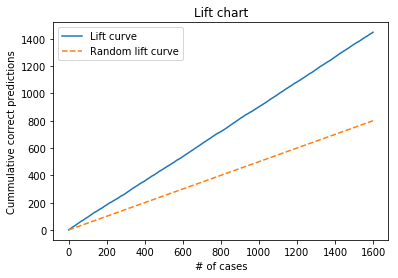

In [52]:
#plot lift curve
x_ = np.linspace(0,customers,customers)
plt.plot(x_, y_cum, '-',  label = 'Lift curve')
plt.plot(x_,random_y_cum, '--', label = 'Random lift curve')
plt.title('Lift chart')
plt.xlabel('# of cases')
plt.ylabel('Cummulative correct predictions')
plt.legend()
    
#Calculate total lift
lift = cum_counter/random_cum_counter
    
print ('Cummulative counter:',cum_counter)
print ('% of succesful classifications:',cum_counter*100/customers)
print ('Random cummulative counter:',random_cum_counter)
print ('\nLift:',lift)

## Exercise 5: k-NN Regression

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
def k_means_regr(k = max_k):
    neigh_r = KNeighborsRegressor(n_neighbors=k)
    return (neigh_r)

In [55]:
neigh_r = k_means_regr(max_k)

#Fit the model using our training data
neigh_r.fit(X_train,y_train)

#Returns the coefficient of determination R^2 of the prediction. (Best: 1/-1, Worst: 0)
print ('Coefficient of determination:',neigh_r.score(X_test,y_test) ) 

#Predict the target for the provided data
pred = neigh_r.predict(X_test)
print ('\nPredicted target for validation data:', pred) 

#Range of predicted data
r = np.ptp(neigh_r.predict(X_test))
print ('Range of predicted values:',r)

Coefficient of determination: -0.05264359474092739

Predicted target for validation data: [0.         0.         0.         ... 0.18181818 0.         0.        ]
Range of predicted values: 0.45454545454545453


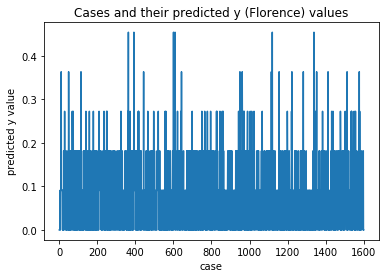

In [56]:
#helpful plot with our predictions

plt.plot(x_,neigh_r.predict(X_test))
plt.title('Cases and their predicted y (Florence) values')
plt.xlabel('case')
plt.ylabel('predicted y value')
plt.show()

Plot results from k-NN regression

In [57]:
y_pred_cum = []

#calculate cummulative prediction
for i in range (0,customers):
    #add next prediction
    if i == 0 :
        y_pred_cum.append(pred[i])
    else:
        next_value = y_pred_cum[-1] + pred[i]
        y_pred_cum.append(next_value)

Cummulative prediction: 125.00000000000148
Random cummulative output: 800.0

Lift: 0.15625000000000186


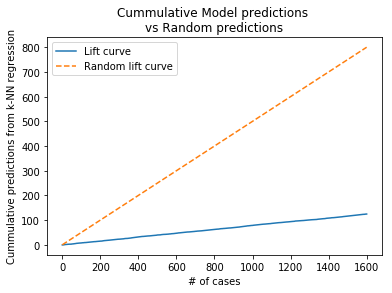

In [58]:
#plot comparison between predictions and random predictions
x_ = np.linspace(0,customers,customers)
plt.plot(x_, y_pred_cum, '-',  label = 'Lift curve')
plt.plot(x_,random_y_cum, '--', label = 'Random lift curve')
plt.title('Cummulative Model predictions \nvs Random predictions')
plt.xlabel('# of cases')
plt.ylabel('Cummulative predictions from k-NN regression')
plt.legend()
    
#Calculate total lift
lift = y_pred_cum[-1]/random_y_cum[-1]
    
print ('Cummulative prediction:',y_pred_cum[-1])
print ('Random cummulative output:',random_y_cum[-1])
print ('\nLift:',lift)

But.. that's not really a lift chart, although it does procide some insight.<br>
Now let's make a lift chart based on the accurate predictions of our model!

In [59]:
#store cummulative y's and random cummulative y's
y_pred_cum = []
random_y_cum = []

#create cumulative correct predictions counter
pred_cum_counter = 0
random_cum_counter = 0
y_test_ = np.asarray(y_test)

#calculate cummulative prediction
for i in range (0,customers):
    
    #check for correct prediction
    if pred[i] == y_test_[i]:
        #add next prediction        
        pred_cum_counter +=  1
    random_cum_counter = random_cum_counter + 0.5
    
    #add next value to the cummulative counter
    y_pred_cum.append(pred_cum_counter)
    random_y_cum.append(random_cum_counter)


Cummulative counter: 616
% of succesful predictions: 38.5
Random cummulative counter: 800.0

Lift: 0.77


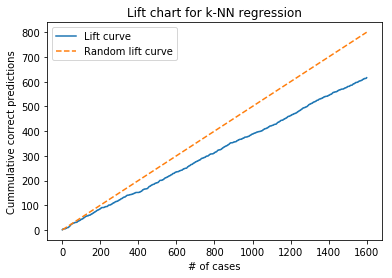

In [60]:
#plot lift curve
x_ = np.linspace(0,customers,customers)
plt.plot(x_, y_pred_cum, '-',  label = 'Lift curve')
plt.plot(x_,random_y_cum, '--', label = 'Random lift curve')
plt.title('Lift chart for k-NN regression')
plt.xlabel('# of cases')
plt.ylabel('Cummulative correct predictions')
plt.legend()
    
#Calculate total lift
lift = pred_cum_counter/random_cum_counter
    
print ('Cummulative counter:',pred_cum_counter)
print ('% of succesful predictions:',pred_cum_counter*100/customers)
print ('Random cummulative counter:',random_cum_counter)
print ('\nLift:',lift)

If we round our predictions to 0 or 1 depended on if they are < or >= 0.5,<br> we have the same output with the classification k-NN algorithm!<br>Let's show this below!

In [61]:
# predictions >=0.5 -> 1, predictions <0.5 -> 0
for i in range (0,customers):
    if pred[i] >= 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

In [62]:
#store cummulative y's and random cummulative y's
y_pred_cum = []
random_y_cum = []

#create cumulative correct predictions counter
pred_cum_counter = 0
random_cum_counter = 0
y_test_ = np.asarray(y_test)

#calculate cummulative prediction
for i in range (0,customers):
    
    #check for correct prediction
    if pred[i] == y_test_[i]:
        #add next prediction        
        pred_cum_counter +=  1
    random_cum_counter = random_cum_counter + 0.5
    
    #add next value to the cummulative counter
    y_pred_cum.append(pred_cum_counter)
    random_y_cum.append(random_cum_counter)


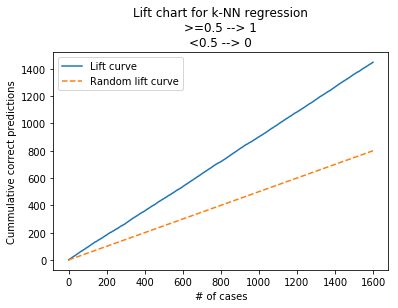

In [63]:
#plot lift curve
x_ = np.linspace(0,customers,customers)
plt.plot(x_, y_pred_cum, '-',  label = 'Lift curve')
plt.plot(x_,random_y_cum, '--', label = 'Random lift curve')
plt.title('Lift chart for k-NN regression\n>=0.5 --> 1\n<0.5 --> 0')
plt.xlabel('# of cases')
plt.ylabel('Cummulative correct predictions')
plt.legend()
plt.show()

## Logistic regression

### Split data to X and y (target variable)

In [64]:
import numpy as np

customers = 1600

In [65]:
predictor_var = ['Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks', 'YouthBks', 
                 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeoBks', 'ItalCook',
                 'ItalAtlas', 'ItalArt', 'Related purchase']
outcome_var = 'Florence'

In [66]:
X = df[predictor_var]
X1 = df[['R', 'F', 'M' ]]
X2 = df[['Gender', 'R', 'F', 'M', 'Related purchase']]
y = df[outcome_var]

### Main Logistic equations

In [67]:
def g(x) :  # sigmoid function
    return 1/(1 + np.exp(-x))

def h(X,w,b) : # Model function
    return g(np.dot(X,w) + b)

### Implement logistic regression from sklearn

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.4, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size = 0.4, random_state=1)

**Train with our training data (60%)** &<br>
**Apply the model to our test data**

In [70]:
def training(model, X_train, y_train):
    
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_train, y_train)
    intercept = model.intercept_
    coefficient = model.coef_
    classes = model.classes_
    return [intercept,coefficient,classes]

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression(solver='liblinear') #I can SAGA, but i need to normalize

*Full 15 predictors*

In [73]:
intercept, coefficient, classes = training(model, X_train, y_train)

In [74]:
print ('15 Predictors:\n',
    'Coefficient:',coefficient,
      '\nIntercept:',intercept)

15 Predictors:
 Coefficient: [[-0.59584019 -0.00091123 -0.02505017  0.20361826  0.00849686 -0.35585894
  -0.11837786 -0.37923766 -0.08165285 -0.22177312  0.22186948  0.03840685
  -0.2961838  -0.24958396  0.39124378  0.10575235]] 
Intercept: [-2.20118431]


In [75]:
test_accuracy = model.score(X_test, y_test)
#save our predictions
predictions = model.predict(X_test)
#save our 1 probabilities
probabilities = model.predict_proba(X_test)[:,1]
print ('Accuracy:',test_accuracy)

Accuracy: 0.905625


*'R, F, M' predictors*

In [76]:
intercept1, coefficient1, classes1 = training(model, X1_train, y1_train)
print ('RFM Predictors:\n',
    'Coefficient:',coefficient1,
      '\nIntercept:',intercept1)

RFM Predictors:
 Coefficient: [[-0.03315861  0.0834549  -0.00077049]] 
Intercept: [-2.23455467]


In [77]:
test_accuracy1 = model.score(X1_test, y1_test)
#save our predictions
predictions1 = model.predict(X1_test)
#save our 1 probabilities
probabilities1 = model.predict_proba(X1_test)[:,1]
print ('Accuracy:',test_accuracy1)

Accuracy: 0.905


*'R, F, M, Gender, Related Purchase' predictors*

In [78]:
intercept2, coefficient2, classes2 = training(model, X2_train, y2_train)

In [79]:
print ('R, F, M, Gender, Related Purchase Predictors:\n',
    'Coefficient:',coefficient2,
      '\nIntercept:',intercept2)

R, F, M, Gender, Related Purchase Predictors:
 Coefficient: [[-0.58070671 -0.03486437  0.0534212  -0.00106209  0.21114321]] 
Intercept: [-1.86499056]


In [80]:
test_accuracy2 = model.score(X2_test, y2_test)
#save our predictions
predictions2 = model.predict(X2_test)
#save our 1 probabilities
probabilities2 = model.predict_proba(X2_test)[:,1]
print ('Accuracy:',test_accuracy2)

Accuracy: 0.905


# Exercise 6: Create lift charts for all our logistic regression models

## Calculate all cummulative vectors for our 3 models

In [81]:
#cummulative correct prediction vectors
cum = []
cum1 = []
cum2 = []
rand_cum = []

#create cumulative correct predictions counter
cum_counter = 0
cum1_counter = 0
cum2_counter = 0
rand_cum_counter = 0

y_test_ = np.asarray(y_test)

#calculate cummulative predictions
for i in range(0,1600):
    #check for correct prediction
    if predictions[i] == y_test_[i]:
        cum_counter += 1 #add next prediction        
    if predictions1[i] == y_test_[i]:
        cum1_counter += 1 #add next prediction 
    if predictions2[i] == y_test_[i]:
        cum2_counter += 1 #add next prediction 
    
    rand_cum_counter = rand_cum_counter + 0.5

    #add next value to the cummulative vector
    cum.append(cum_counter)
    cum1.append(cum1_counter)
    cum2.append(cum2_counter)
    rand_cum.append(rand_cum_counter)
        
        

## Draw lift charts


	15 Variables:
Cummulative counter: 1449
% of succesful predictions: 90.5625

	RFM Variables:
Cummulative counter: 1448
% of succesful predictions: 90.5

	5 Variables:
Cummulative counter: 1448
% of succesful predictions: 90.5

Random cummulative counter: 800.0

15 Variables: Lift = 1.81125
RFM Variables: Lift = 1.81
5 Variables: Lift = 1.81


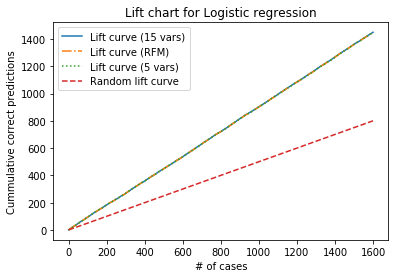

In [82]:
#plot lift curve
x_ = np.linspace(0,1600,1600)
plt.plot(x_, cum, '-',  label = 'Lift curve (15 vars)')
plt.plot(x_, cum1, '-.',  label = 'Lift curve (RFM)')
plt.plot(x_, cum2, ':',  label = 'Lift curve (5 vars)')
plt.plot(x_,rand_cum, '--', label = 'Random lift curve')
plt.title('Lift chart for Logistic regression')
plt.xlabel('# of cases')
plt.ylabel('Cummulative correct predictions')
plt.legend()
    
#Calculate total lift
lift = cum[-1]/rand_cum[-1]
lift1 = cum1[-1]/rand_cum[-1]
lift2 = cum2[-1]/rand_cum[-1]
    
print ('\n\t15 Variables:')
print ('Cummulative counter:',cum_counter)
print ('% of succesful predictions:',cum_counter*100/customers)

print ('\n\tRFM Variables:')
print ('Cummulative counter:',cum1_counter)
print ('% of succesful predictions:',cum1_counter*100/customers)

print ('\n\t5 Variables:')
print ('Cummulative counter:',cum2_counter)
print ('% of succesful predictions:',cum2_counter*100/customers)


print ('\nRandom cummulative counter:',rand_cum_counter)

print ('\n15 Variables: Lift =',lift)
print ('RFM Variables: Lift =',lift1)
print ('5 Variables: Lift =',lift2)

# Exercise 7: Find out the customers with probability to buy the new book >30%

These are the customers that bought the book in the validation data:
 (array([  27,   29,   68,   71,   72,   89,   98,  129,  140,  144,  145,
        156,  164,  170,  172,  180,  195,  200,  219,  221,  223,  234,
        235,  247,  249,  255,  256,  273,  280,  281,  283,  290,  330,
        340,  355,  357,  364,  380,  389,  391,  392,  400,  416,  425,
        442,  444,  448,  461,  481,  488,  493,  497,  508,  519,  527,
        528,  537,  549,  563,  575,  576,  584,  587,  609,  623,  631,
        648,  666,  680,  703,  716,  731,  739,  755,  776,  780,  786,
        788,  791,  798,  801,  817,  818,  847,  870,  900,  909,  913,
        934,  937,  939,  949,  954,  957,  961,  975,  979,  988, 1000,
       1008, 1014, 1026, 1031, 1061, 1069, 1073, 1087, 1094, 1121, 1136,
       1146, 1151, 1164, 1167, 1191, 1193, 1198, 1210, 1213, 1226, 1233,
       1246, 1267, 1273, 1276, 1324, 1325, 1333, 1340, 1359, 1363, 1369,
       1370, 1425, 1431, 1441, 1449, 1453, 1465, 1478

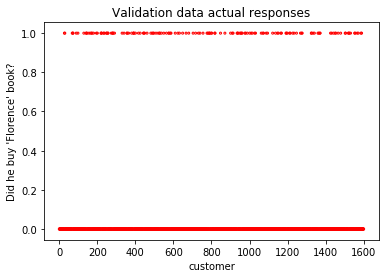

In [83]:
print ('These are the customers that bought the book in the validation data:\n',np.where(y_test_==1))
x = np.linspace(0, 1600, 1600)
plt.scatter(x,y_test_,marker='o',facecolors='none',edgecolors='red'
            ,s=4,label='validation data')
plt.title('Validation data actual responses')
plt.ylabel('Did he buy \'Florence\' book?')
plt.xlabel('customer')
plt.show()

In [84]:
print ('15 variables logistic regression\n')
c = 0
for i in range (0,1600):
    if probabilities[i] >= 0.3:
        print ('Customer:',i)
        c += 1
        
print ('\nTotal amount of customers targeted:',c)        


15 variables logistic regression

Customer: 28
Customer: 68
Customer: 78
Customer: 140
Customer: 235
Customer: 249
Customer: 304
Customer: 399
Customer: 402
Customer: 442
Customer: 443
Customer: 584
Customer: 631
Customer: 786
Customer: 791
Customer: 795
Customer: 818
Customer: 949
Customer: 988
Customer: 1073
Customer: 1198
Customer: 1317

Total amount of customers targeted: 22


In [85]:
print ('RFM variables logistic regression\n')
c = 0
for i in range (0,1600):
    if probabilities1[i] >= 0.3:
        print ('Customer:',i)
        c += 1
        
print ('\nTotal amount of customers targeted:',c)        


RFM variables logistic regression


Total amount of customers targeted: 0


In [86]:
print ('5 variables logistic regression\n')
c = 0
for i in range (0,1600):
    if probabilities2[i] >= 0.3:
        print ('Customer:',i)
        c += 1
        
print ('\nTotal amount of customers targeted:',c)        


5 variables logistic regression

Customer: 114
Customer: 631
Customer: 987
Customer: 1146
Customer: 1409

Total amount of customers targeted: 5
